In [1]:
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/data_loader.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/extractNet_connected_vgg19_bn.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/helper.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/metrics.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/model_blocks.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/trainer.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/visualizer.py

--2019-03-31 01:32:50--  https://github.com/MNRKhan/aps360-project/raw/master/modules/data_loader.py
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MNRKhan/aps360-project/master/modules/data_loader.py [following]
--2019-03-31 01:32:50--  https://raw.githubusercontent.com/MNRKhan/aps360-project/master/modules/data_loader.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1837 (1.8K) [text/plain]
Saving to: ‘data_loader.py’

data_loader.py      100%[===================>]   1.79K  --.-KB/s    in 0s      

2019-03-31 01:32:50 (43.5 MB/s) - ‘data_loader.py’ saved [1837/1837]

--2019-0

In [2]:
import numpy as np
import random
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

from data_loader import *
from extractNet_connected_vgg19_bn import *
from helper import *
from metrics import *
from model_blocks import *
from trainer import *
from visualizer import *

In [3]:
!rm -rf __MACOSX
!rm -rf *.zip
!wget https://github.com/MNRKhan/aps360-project/raw/master/datasets/train2014/data_person_vehicle.zip
!unzip data_person_vehicle.zip
!rm -rf __MACOSX
!rm -rf *.zip

--2019-03-31 01:32:58--  https://github.com/MNRKhan/aps360-project/raw/master/datasets/train2014/data_person_vehicle.zip
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/MNRKhan/aps360-project/master/datasets/train2014/data_person_vehicle.zip [following]
--2019-03-31 01:32:58--  https://media.githubusercontent.com/media/MNRKhan/aps360-project/master/datasets/train2014/data_person_vehicle.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 141567675 (135M) [application/zip]
Saving to: ‘data_person_vehicle.zip’

data_person_vehicle 100%[===================>] 135.01M  

  inflating: data/images/4808.jpg    
  inflating: data/images/214.jpg     
  inflating: data/images/1780.jpg    
  inflating: data/images/1958.jpg    
  inflating: data/images/3197.jpg    
  inflating: data/images/4820.jpg    
  inflating: data/images/2289.jpg    
  inflating: data/images/5280.jpg    
  inflating: data/images/3829.jpg    
  inflating: data/images/6951.jpg    
  inflating: data/images/7497.jpg    
  inflating: data/images/6789.jpg    
  inflating: data/images/572.jpg     
  inflating: data/images/6945.jpg    
  inflating: data/images/7483.jpg    
  inflating: data/images/566.jpg     
  inflating: data/images/8968.jpg    
  inflating: data/images/5294.jpg    
  inflating: data/images/3183.jpg    
  inflating: data/images/4834.jpg    
  inflating: data/images/1794.jpg    
  inflating: data/images/200.jpg     
  inflating: data/images/8559.jpg    
  inflating: data/images/957.jpg     
  inflating: data/images/9647.jpg    
  inflating: data/images/6574.jpg    
  inflating:

  inflating: data/images/8160.jpg    
  inflating: data/images/1622.jpg    
  inflating: data/images/7247.jpg    
  inflating: data/images/8174.jpg    
  inflating: data/images/1636.jpg    
  inflating: data/images/6159.jpg    
  inflating: data/images/5450.jpg    
  inflating: data/images/4996.jpg    
  inflating: data/images/3021.jpg    
  inflating: data/images/4028.jpg    
  inflating: data/images/3747.jpg    
  inflating: data/images/2459.jpg    
  inflating: data/images/5336.jpg    
  inflating: data/images/1150.jpg    
  inflating: data/images/7521.jpg    
  inflating: data/images/8612.jpg    
  inflating: data/images/4000.jpg    
  inflating: data/images/2471.jpg    
  inflating: data/images/9524.jpg    
  inflating: data/images/6617.jpg    
  inflating: data/images/1178.jpg    
  inflating: data/images/7509.jpg    
  inflating: data/images/9242.jpg    
  inflating: data/images/6171.jpg    
  inflating: data/images/5478.jpg    
  inflating: data/images/2317.jpg    
  inflating:

  inflating: data/images/5532.jpg    
  inflating: data/images/3143.jpg    
  inflating: data/images/3625.jpg    
  inflating: data/images/5254.jpg    
  inflating: data/images/1032.jpg    
  inflating: data/images/6985.jpg    
  inflating: data/images/7443.jpg    
  inflating: data/images/8770.jpg    
  inflating: data/images/6749.jpg    
  inflating: data/images/1026.jpg    
  inflating: data/images/6991.jpg    
  inflating: data/images/7457.jpg    
  inflating: data/images/8764.jpg    
  inflating: data/images/3631.jpg    
  inflating: data/images/5240.jpg    
  inflating: data/images/5526.jpg    
  inflating: data/images/2249.jpg    
  inflating: data/images/3157.jpg    
  inflating: data/images/4638.jpg    
  inflating: data/images/7331.jpg    
  inflating: data/images/8002.jpg    
  inflating: data/images/1998.jpg    
  inflating: data/images/1740.jpg    
  inflating: data/images/1973.jpg    
  inflating: data/images/3802.jpg    
  inflating: data/images/9491.jpg    
  inflating:

  inflating: data/images/410.jpg     
  inflating: data/images/1184.jpg    
  inflating: data/images/3963.jpg    
  inflating: data/images/8836.jpg    
  inflating: data/images/438.jpg     
  inflating: data/images/9296.jpg    
  inflating: data/images/8188.jpg    
  inflating: data/images/1812.jpg    
  inflating: data/images/9282.jpg    
  inflating: data/images/1806.jpg    
  inflating: data/images/8822.jpg    
  inflating: data/images/3977.jpg    
  inflating: data/images/3744.jpg    
  inflating: data/images/5335.jpg    
  inflating: data/images/1153.jpg    
  inflating: data/images/8611.jpg    
  inflating: data/images/7522.jpg    
  inflating: data/images/8177.jpg    
  inflating: data/images/7244.jpg    
  inflating: data/images/1635.jpg    
  inflating: data/images/9269.jpg    
  inflating: data/images/5453.jpg    
  inflating: data/images/4995.jpg    
  inflating: data/images/3022.jpg    
  inflating: data/images/5447.jpg    
  inflating: data/images/4981.jpg    
  inflating:

  inflating: data/images/9292.jpg    
  inflating: data/images/8832.jpg    
  inflating: data/images/3967.jpg    
  inflating: data/images/3620.jpg    
  inflating: data/images/5251.jpg    
  inflating: data/images/1037.jpg    
  inflating: data/images/6758.jpg    
  inflating: data/images/7446.jpg    
  inflating: data/images/8775.jpg    
  inflating: data/images/6980.jpg    
  inflating: data/images/7320.jpg    
  inflating: data/images/8013.jpg    
  inflating: data/images/1989.jpg    
  inflating: data/images/1751.jpg    
  inflating: data/images/2258.jpg    
  inflating: data/images/5537.jpg    
  inflating: data/images/4629.jpg    
  inflating: data/images/3146.jpg    
  inflating: data/images/5523.jpg    
  inflating: data/images/3152.jpg    
  inflating: data/images/7334.jpg    
  inflating: data/images/8007.jpg    
  inflating: data/images/9319.jpg    
  inflating: data/images/1745.jpg    
  inflating: data/images/1023.jpg    
  inflating: data/images/7452.jpg    
  inflating:

  inflating: data/images/6981.jpg    
  inflating: data/images/8774.jpg    
  inflating: data/images/7447.jpg    
  inflating: data/images/6759.jpg    
  inflating: data/images/1036.jpg    
  inflating: data/images/5250.jpg    
  inflating: data/images/3621.jpg    
  inflating: data/images/3147.jpg    
  inflating: data/images/4628.jpg    
  inflating: data/images/5536.jpg    
  inflating: data/images/2259.jpg    
  inflating: data/images/1750.jpg    
  inflating: data/images/8012.jpg    
  inflating: data/images/1988.jpg    
  inflating: data/images/7321.jpg    
  inflating: data/images/9293.jpg    
  inflating: data/images/1817.jpg    
  inflating: data/images/3966.jpg    
  inflating: data/images/8833.jpg    
  inflating: data/images/8827.jpg    
  inflating: data/images/429.jpg     
  inflating: data/images/3972.jpg    
  inflating: data/images/9287.jpg    
  inflating: data/images/8199.jpg    
  inflating: data/images/1803.jpg    
  inflating: data/images/4953.jpg    
  inflating:

  inflating: data/images/7531.jpg    
  inflating: data/images/1140.jpg    
  inflating: data/images/2461.jpg    
  inflating: data/images/4010.jpg    
  inflating: data/images/7519.jpg    
  inflating: data/images/6607.jpg    
  inflating: data/images/9534.jpg    
  inflating: data/images/1168.jpg    
  inflating: data/images/6161.jpg    
  inflating: data/images/9252.jpg    
  inflating: data/images/3019.jpg    
  inflating: data/images/4776.jpg    
  inflating: data/images/5468.jpg    
  inflating: data/images/2307.jpg    
  inflating: data/images/4762.jpg    
  inflating: data/images/2313.jpg    
  inflating: data/images/6175.jpg    
  inflating: data/images/9246.jpg    
  inflating: data/images/8158.jpg    
  inflating: data/images/6613.jpg    
  inflating: data/images/9520.jpg    
  inflating: data/images/2475.jpg    
  inflating: data/images/4004.jpg    
  inflating: data/images/3780.jpg    
  inflating: data/images/3958.jpg    
  inflating: data/images/403.jpg     
  inflating:

  inflating: data/images/9119.jpg    
  inflating: data/images/1545.jpg    
  inflating: data/images/1223.jpg    
  inflating: data/images/8561.jpg    
  inflating: data/images/7652.jpg    
  inflating: data/images/3434.jpg    
  inflating: data/images/5045.jpg    
  inflating: data/images/1974.jpg    
  inflating: data/images/238.jpg     
  inflating: data/images/9496.jpg    
  inflating: data/images/8950.jpg    
  inflating: data/images/8788.jpg    
  inflating: data/images/3805.jpg    
  inflating: data/images/3811.jpg    
  inflating: data/images/9482.jpg    
  inflating: data/images/8944.jpg    
  inflating: data/images/6969.jpg    
  inflating: data/images/1960.jpg    
  inflating: data/images/4818.jpg    
  inflating: data/images/1948.jpg    
  inflating: data/images/204.jpg     
  inflating: data/images/1790.jpg    
  inflating: data/images/2299.jpg    
  inflating: data/images/4830.jpg    
  inflating: data/images/3187.jpg    
  inflating: data/images/3839.jpg    
  inflating:

  inflating: data/images/9022.jpg    
  inflating: data/images/5630.jpg    
  inflating: data/images/3241.jpg    
  inflating: data/images/8314.jpg    
  inflating: data/images/7027.jpg    
  inflating: data/images/1456.jpg    
  inflating: data/images/6339.jpg    
  inflating: data/images/1330.jpg    
  inflating: data/images/7999.jpg    
  inflating: data/images/8472.jpg    
  inflating: data/images/7741.jpg    
  inflating: data/images/4248.jpg    
  inflating: data/images/3527.jpg    
  inflating: data/images/2639.jpg    
  inflating: data/images/5156.jpg    
  inflating: data/images/3533.jpg    
  inflating: data/images/5142.jpg    
  inflating: data/images/9778.jpg    
  inflating: data/images/28.jpg      
  inflating: data/images/1324.jpg    
  inflating: data/images/868.jpg     
  inflating: data/images/8466.jpg    
  inflating: data/images/7755.jpg    
  inflating: data/images/8300.jpg    
  inflating: data/images/7033.jpg    
  inflating: data/images/1442.jpg    
  inflating:

  inflating: data/images/706.jpg     
  inflating: data/images/7185.jpg    
  inflating: data/images/5792.jpg    
  inflating: data/images/4498.jpg    
  inflating: data/images/5786.jpg    
  inflating: data/images/7191.jpg    
  inflating: data/images/9802.jpg    
  inflating: data/images/712.jpg     
  inflating: data/images/1286.jpg    
  inflating: data/images/2957.jpg    
  inflating: data/images/3491.jpg    
  inflating: data/images/7807.jpg    
  inflating: data/images/5976.jpg    
  inflating: data/images/9194.jpg    
  inflating: data/images/9180.jpg    
  inflating: data/images/5962.jpg    
  inflating: data/images/7813.jpg    
  inflating: data/images/1251.jpg    
  inflating: data/images/7620.jpg    
  inflating: data/images/8513.jpg    
  inflating: data/images/2980.jpg    
  inflating: data/images/4329.jpg    
  inflating: data/images/3446.jpg    
  inflating: data/images/2758.jpg    
  inflating: data/images/5037.jpg    
  inflating: data/images/5751.jpg    
  inflating:

  inflating: data/images/9037.jpg    
  inflating: data/images/6304.jpg    
  inflating: data/images/8329.jpg    
  inflating: data/images/841.jpg     
  inflating: data/images/699.jpg     
  inflating: data/images/9751.jpg    
  inflating: data/images/6462.jpg    
  inflating: data/images/2604.jpg    
  inflating: data/images/4275.jpg    
  inflating: data/images/2174.jpg    
  inflating: data/images/4505.jpg    
  inflating: data/images/9021.jpg    
  inflating: data/images/6312.jpg    
  inflating: data/images/9747.jpg    
  inflating: data/images/6474.jpg    
  inflating: data/images/17.jpg      
  inflating: data/images/8459.jpg    
  inflating: data/images/857.jpg     
  inflating: data/images/4263.jpg    
  inflating: data/images/2612.jpg    
  inflating: data/images/4277.jpg    
  inflating: data/images/3518.jpg    
  inflating: data/images/2606.jpg    
  inflating: data/images/5169.jpg    
  inflating: data/images/9753.jpg    
  inflating: data/images/6460.jpg    
  inflating:

  inflating: data/images/7150.jpg    
  inflating: data/images/8263.jpg    
  inflating: data/images/8288.jpg    
  inflating: data/images/9196.jpg    
  inflating: data/images/5974.jpg    
  inflating: data/images/738.jpg     
  inflating: data/images/7805.jpg    
  inflating: data/images/9828.jpg    
  inflating: data/images/7811.jpg    
  inflating: data/images/2969.jpg    
  inflating: data/images/5960.jpg    
  inflating: data/images/9182.jpg    
  inflating: data/images/5790.jpg    
  inflating: data/images/5948.jpg    
  inflating: data/images/7187.jpg    
  inflating: data/images/6299.jpg    
  inflating: data/images/7839.jpg    
  inflating: data/images/704.jpg     
  inflating: data/images/1290.jpg    
  inflating: data/images/9814.jpg    
  inflating: data/images/3487.jpg    
  inflating: data/images/2941.jpg    
  inflating: data/images/2799.jpg    
  inflating: data/images/3493.jpg    
  inflating: data/images/2955.jpg    
  inflating: data/images/1284.jpg    
  inflating:

  inflating: data/images/671.jpg     
  inflating: data/images/7794.jpg    
  inflating: data/images/7964.jpg    
  inflating: data/images/659.jpg     
  inflating: data/images/9791.jpg    
  inflating: data/images/881.jpg     
  inflating: data/images/5815.jpg    
  inflating: data/images/5801.jpg    
  inflating: data/images/7970.jpg    
  inflating: data/images/9785.jpg    
  inflating: data/images/895.jpg     
  inflating: data/images/2808.jpg    
  inflating: data/images/5154.jpg    
  inflating: data/images/3525.jpg    
  inflating: data/images/8470.jpg    
  inflating: data/images/7743.jpg    
  inflating: data/images/1332.jpg    
  inflating: data/images/9008.jpg    
  inflating: data/images/1454.jpg    
  inflating: data/images/8316.jpg    
  inflating: data/images/7025.jpg    
  inflating: data/images/3243.jpg    
  inflating: data/images/5632.jpg    
  inflating: data/images/4538.jpg    
  inflating: data/images/3257.jpg    
  inflating: data/images/2149.jpg    
  inflating:

  inflating: data/images/271.jpg     
  inflating: data/images/7394.jpg    
  inflating: data/images/9391.jpg    
  inflating: data/images/259.jpg     
  inflating: data/images/1915.jpg    
  inflating: data/images/8931.jpg    
  inflating: data/images/3864.jpg    
  inflating: data/images/3870.jpg    
  inflating: data/images/6908.jpg    
  inflating: data/images/8925.jpg    
  inflating: data/images/9385.jpg    
  inflating: data/images/1901.jpg    
  inflating: data/images/4879.jpg    
  inflating: data/images/5030.jpg    
  inflating: data/images/2987.jpg    
  inflating: data/images/3441.jpg    
  inflating: data/images/7627.jpg    
  inflating: data/images/8514.jpg    
  inflating: data/images/6539.jpg    
  inflating: data/images/1256.jpg    
  inflating: data/images/1530.jpg    
  inflating: data/images/7141.jpg    
  inflating: data/images/8272.jpg    
  inflating: data/images/3327.jpg    
  inflating: data/images/4448.jpg    
  inflating: data/images/5756.jpg    
  inflating:

  inflating: data/images/5384.jpg    
  inflating: data/images/4071.jpg    
  inflating: data/images/2400.jpg    
  inflating: data/images/1109.jpg    
  inflating: data/images/8893.jpg    
  inflating: data/images/9555.jpg    
  inflating: data/images/6666.jpg    
  inflating: data/images/7578.jpg    
  inflating: data/images/9233.jpg    
  inflating: data/images/6100.jpg    
  inflating: data/images/2366.jpg    
  inflating: data/images/5409.jpg    
  inflating: data/images/4717.jpg    
  inflating: data/images/3078.jpg    
  inflating: data/images/2372.jpg    
  inflating: data/images/4703.jpg    
  inflating: data/images/8139.jpg    
  inflating: data/images/9227.jpg    
  inflating: data/images/6114.jpg    
  inflating: data/images/8887.jpg    
  inflating: data/images/489.jpg     
  inflating: data/images/9541.jpg    
  inflating: data/images/6672.jpg    
  inflating: data/images/4065.jpg    
  inflating: data/images/2414.jpg    
  inflating: data/images/1135.jpg    
  inflating:

  inflating: data/images/9580.jpg    
  inflating: data/images/8846.jpg    
  inflating: data/images/448.jpg     
  inflating: data/images/3913.jpg    
  inflating: data/images/1862.jpg    
  inflating: data/images/7354.jpg    
  inflating: data/images/8067.jpg    
  inflating: data/images/9379.jpg    
  inflating: data/images/1725.jpg    
  inflating: data/images/4885.jpg    
  inflating: data/images/5543.jpg    
  inflating: data/images/3132.jpg    
  inflating: data/images/3654.jpg    
  inflating: data/images/5225.jpg    
  inflating: data/images/1043.jpg    
  inflating: data/images/7432.jpg    
  inflating: data/images/8701.jpg    
  inflating: data/images/1057.jpg    
  inflating: data/images/6738.jpg    
  inflating: data/images/7426.jpg    
  inflating: data/images/8715.jpg    
  inflating: data/images/3640.jpg    
  inflating: data/images/3898.jpg    
  inflating: data/images/5231.jpg    
  inflating: data/images/2238.jpg    
  inflating: data/images/4891.jpg    
  inflating:

  inflating: data/images/3127.jpg    
  inflating: data/images/4648.jpg    
  inflating: data/images/5556.jpg    
  inflating: data/images/4890.jpg    
  inflating: data/images/2239.jpg    
  inflating: data/images/3133.jpg    
  inflating: data/images/5542.jpg    
  inflating: data/images/4884.jpg    
  inflating: data/images/1724.jpg    
  inflating: data/images/9378.jpg    
  inflating: data/images/8066.jpg    
  inflating: data/images/7355.jpg    
  inflating: data/images/8700.jpg    
  inflating: data/images/7433.jpg    
  inflating: data/images/1042.jpg    
  inflating: data/images/5224.jpg    
  inflating: data/images/3655.jpg    
  inflating: data/images/3912.jpg    
  inflating: data/images/8847.jpg    
  inflating: data/images/449.jpg     
  inflating: data/images/9581.jpg    
  inflating: data/images/1863.jpg    
  inflating: data/images/1877.jpg    
  inflating: data/images/8853.jpg    
  inflating: data/images/9595.jpg    
  inflating: data/images/3906.jpg    
  inflating:

  inflating: data/images/7576.jpg    
  inflating: data/images/8645.jpg    
  inflating: data/images/493.jpg     
  inflating: data/images/1107.jpg    
  inflating: data/images/6668.jpg    
  inflating: data/images/478.jpg     
  inflating: data/images/8876.jpg    
  inflating: data/images/6683.jpg    
  inflating: data/images/4094.jpg    
  inflating: data/images/3923.jpg    
  inflating: data/images/2383.jpg    
  inflating: data/images/1852.jpg    
  inflating: data/images/1846.jpg    
  inflating: data/images/2397.jpg    
  inflating: data/images/3089.jpg    
  inflating: data/images/4080.jpg    
  inflating: data/images/3937.jpg    
  inflating: data/images/8862.jpg    
  inflating: data/images/6697.jpg    
  inflating: data/images/7589.jpg    
  inflating: data/images/444.jpg     
  inflating: data/images/8692.jpg    
  inflating: data/images/6867.jpg    
  inflating: data/images/322.jpg     
  inflating: data/images/4916.jpg    
  inflating: data/images/4902.jpg    
  inflating:

  inflating: data/images/8042.jpg    
  inflating: data/images/7371.jpg    
  inflating: data/images/4678.jpg    
  inflating: data/images/3117.jpg    
  inflating: data/images/2209.jpg    
  inflating: data/images/5566.jpg    
  inflating: data/images/6047.jpg    
  inflating: data/images/9374.jpg    
  inflating: data/images/1728.jpg    
  inflating: data/images/7359.jpg    
  inflating: data/images/4650.jpg    
  inflating: data/images/2221.jpg    
  inflating: data/images/4888.jpg    
  inflating: data/images/3881.jpg    
  inflating: data/images/5228.jpg    
  inflating: data/images/2547.jpg    
  inflating: data/images/3659.jpg    
  inflating: data/images/4136.jpg    
  inflating: data/images/6721.jpg    
  inflating: data/images/9412.jpg    
  inflating: data/images/8718.jpg    
  inflating: data/images/6735.jpg    
  inflating: data/images/9406.jpg    
  inflating: data/images/3895.jpg    
  inflating: data/images/2553.jpg    
  inflating: data/images/4122.jpg    
  inflating:

  inflating: data/images/7207.jpg    
  inflating: data/images/8652.jpg    
  inflating: data/images/7561.jpg    
  inflating: data/images/1110.jpg    
  inflating: data/images/484.jpg     
  inflating: data/images/5376.jpg    
  inflating: data/images/2419.jpg    
  inflating: data/images/3707.jpg    
  inflating: data/images/4068.jpg    
  inflating: data/images/4083.jpg    
  inflating: data/images/3934.jpg    
  inflating: data/images/8861.jpg    
  inflating: data/images/6694.jpg    
  inflating: data/images/1845.jpg    
  inflating: data/images/309.jpg     
  inflating: data/images/2394.jpg    
  inflating: data/images/2380.jpg    
  inflating: data/images/4929.jpg    
  inflating: data/images/1851.jpg    
  inflating: data/images/1689.jpg    
  inflating: data/images/8875.jpg    
  inflating: data/images/6680.jpg    
  inflating: data/images/6858.jpg    
  inflating: data/images/4097.jpg    
  inflating: data/images/3920.jpg    
  inflating: data/images/5389.jpg    
  inflating:

  inflating: data/images/3841.jpg    
  inflating: data/images/2587.jpg    
  inflating: data/images/4848.jpg    
  inflating: data/images/4690.jpg    
  inflating: data/images/1930.jpg    
  inflating: data/images/7399.jpg    
  inflating: data/images/6087.jpg    
  inflating: data/images/297.jpg     
  inflating: data/images/1703.jpg    
  inflating: data/images/7372.jpg    
  inflating: data/images/8041.jpg    
  inflating: data/images/3114.jpg    
  inflating: data/images/5565.jpg    
  inflating: data/images/5203.jpg    
  inflating: data/images/3672.jpg    
  inflating: data/images/7414.jpg    
  inflating: data/images/8727.jpg    
  inflating: data/images/1065.jpg    
  inflating: data/images/9439.jpg    
  inflating: data/images/7400.jpg    
  inflating: data/images/8733.jpg    
  inflating: data/images/1071.jpg    
  inflating: data/images/5217.jpg    
  inflating: data/images/2578.jpg    
  inflating: data/images/3666.jpg    
  inflating: data/images/4109.jpg    
  inflating:

  inflating: data/images/7216.jpg    
  inflating: data/images/3070.jpg    
  inflating: data/images/5401.jpg    
  inflating: data/images/2408.jpg    
  inflating: data/images/5367.jpg    
  inflating: data/images/4079.jpg    
  inflating: data/images/3716.jpg    
  inflating: data/images/8643.jpg    
  inflating: data/images/7570.jpg    
  inflating: data/images/495.jpg     
  inflating: data/images/1101.jpg    
  inflating: data/images/8657.jpg    
  inflating: data/images/7564.jpg    
  inflating: data/images/9549.jpg    
  inflating: data/images/1115.jpg    
  inflating: data/images/481.jpg     
  inflating: data/images/5373.jpg    
  inflating: data/images/3702.jpg    
  inflating: data/images/3064.jpg    
  inflating: data/images/5415.jpg    
  inflating: data/images/1673.jpg    
  inflating: data/images/8131.jpg    
  inflating: data/images/7202.jpg    
  inflating: data/images/4723.jpg    
  inflating: data/images/2352.jpg    
  inflating: data/images/6134.jpg    
  inflating:

  inflating: data/images/8252.jpg    
  inflating: data/images/7161.jpg    
  inflating: data/images/1510.jpg    
  inflating: data/images/2019.jpg    
  inflating: data/images/5776.jpg    
  inflating: data/images/4468.jpg    
  inflating: data/images/3307.jpg    
  inflating: data/images/3688.jpg    
  inflating: data/images/2596.jpg    
  inflating: data/images/3850.jpg    
  inflating: data/images/8905.jpg    
  inflating: data/images/6928.jpg    
  inflating: data/images/1921.jpg    
  inflating: data/images/7388.jpg    
  inflating: data/images/6096.jpg    
  inflating: data/images/4859.jpg    
  inflating: data/images/4681.jpg    
  inflating: data/images/4695.jpg    
  inflating: data/images/1935.jpg    
  inflating: data/images/279.jpg     
  inflating: data/images/6082.jpg    
  inflating: data/images/8911.jpg    
  inflating: data/images/2582.jpg    
  inflating: data/images/3844.jpg    
  inflating: data/images/8939.jpg    
  inflating: data/images/537.jpg     
  inflating:

  inflating: data/images/7995.jpg    
  inflating: data/images/30.jpg      
  inflating: data/images/6453.jpg    
  inflating: data/images/9760.jpg    
  inflating: data/images/870.jpg     
  inflating: data/images/8495.jpg    
  inflating: data/images/643.jpg     
  inflating: data/images/2806.jpg    
  inflating: data/images/125.jpg     
  inflating: data/images/131.jpg     
  inflating: data/images/2812.jpg    
  inflating: data/images/8481.jpg    
  inflating: data/images/657.jpg     
  inflating: data/images/4293.jpg    
  inflating: data/images/7942.jpg    
  inflating: data/images/6484.jpg    
  inflating: data/images/119.jpg     
  inflating: data/images/5833.jpg    
  inflating: data/images/2184.jpg    
  inflating: data/images/5827.jpg    
  inflating: data/images/2190.jpg    
  inflating: data/images/1499.jpg    
  inflating: data/images/7956.jpg    
  inflating: data/images/6490.jpg    
  inflating: data/images/5199.jpg    
  inflating: data/images/4287.jpg    
  inflating:

  inflating: data/images/4443.jpg    
  inflating: data/images/5985.jpg    
  inflating: data/images/7162.jpg    
  inflating: data/images/8251.jpg    
  inflating: data/images/1513.jpg    
  inflating: data/images/5775.jpg    
  inflating: data/images/3304.jpg    
  inflating: data/images/3462.jpg    
  inflating: data/images/5013.jpg    
  inflating: data/images/1275.jpg    
  inflating: data/images/9629.jpg    
  inflating: data/images/7604.jpg    
  inflating: data/images/8537.jpg    
  inflating: data/images/939.jpg     
  inflating: data/images/1261.jpg    
  inflating: data/images/7610.jpg    
  inflating: data/images/8523.jpg    
  inflating: data/images/3476.jpg    
  inflating: data/images/4319.jpg    
  inflating: data/images/5007.jpg    
  inflating: data/images/2768.jpg    
  inflating: data/images/5761.jpg    
  inflating: data/images/3310.jpg    
  inflating: data/images/7176.jpg    
  inflating: data/images/8245.jpg    
  inflating: data/images/6268.jpg    
  inflating:

  inflating: data/images/180.jpg     
  inflating: data/images/1414.jpg    
  inflating: data/images/9048.jpg    
  inflating: data/images/7071.jpg    
  inflating: data/images/8342.jpg    
  inflating: data/images/1400.jpg    
  inflating: data/images/194.jpg     
  inflating: data/images/5666.jpg    
  inflating: data/images/2109.jpg    
  inflating: data/images/3217.jpg    
  inflating: data/images/4578.jpg    
  inflating: data/images/3571.jpg    
  inflating: data/images/5100.jpg    
  inflating: data/images/6409.jpg    
  inflating: data/images/1366.jpg    
  inflating: data/images/7717.jpg    
  inflating: data/images/8424.jpg    
  inflating: data/images/9909.jpg    
  inflating: data/images/81.jpg      
  inflating: data/images/619.jpg     
  inflating: data/images/7924.jpg    
  inflating: data/images/2684.jpg    
  inflating: data/images/5855.jpg    
  inflating: data/images/4593.jpg    
  inflating: data/images/6384.jpg    
  inflating: data/images/6390.jpg    
  inflating:

  inflating: data/images/9840.jpg    
  inflating: data/images/8586.jpg    
  inflating: data/images/988.jpg     
  inflating: data/images/9698.jpg    
  inflating: data/images/750.jpg     
  inflating: data/images/2915.jpg    
  inflating: data/images/5934.jpg    
  inflating: data/images/2083.jpg    
  inflating: data/images/9868.jpg    
  inflating: data/images/6583.jpg    
  inflating: data/images/7845.jpg    
  inflating: data/images/778.jpg     
  inflating: data/images/4394.jpg    
  inflating: data/images/2929.jpg    
  inflating: data/images/4380.jpg    
  inflating: data/images/7689.jpg    
  inflating: data/images/6597.jpg    
  inflating: data/images/7851.jpg    
  inflating: data/images/3389.jpg    
  inflating: data/images/5920.jpg    
  inflating: data/images/2097.jpg    
  inflating: data/images/5713.jpg    
  inflating: data/images/3362.jpg    
  inflating: data/images/8237.jpg    
  inflating: data/images/7104.jpg    
  inflating: data/images/1575.jpg    
  inflating:

  inflating: data/images/2134.jpg    
  inflating: data/images/2652.jpg    
  inflating: data/images/4223.jpg    
  inflating: data/images/817.jpg     
  inflating: data/images/8419.jpg    
  inflating: data/images/57.jpg      
  inflating: data/images/6434.jpg    
  inflating: data/images/9707.jpg    
  inflating: data/images/803.jpg     
  inflating: data/images/6420.jpg    
  inflating: data/images/43.jpg      
  inflating: data/images/9713.jpg    
  inflating: data/images/5129.jpg    
  inflating: data/images/2646.jpg    
  inflating: data/images/3558.jpg    
  inflating: data/images/4237.jpg    
  inflating: data/images/4551.jpg    
  inflating: data/images/5897.jpg    
  inflating: data/images/2120.jpg    
  inflating: data/images/6346.jpg    
  inflating: data/images/9075.jpg    
  inflating: data/images/1429.jpg    
  inflating: data/images/7058.jpg    
  inflating: data/images/6436.jpg    
  inflating: data/images/55.jpg      
  inflating: data/images/9705.jpg    
  inflating:

  inflating: data/images/7660.jpg    
  inflating: data/images/9895.jpg    
  inflating: data/images/1211.jpg    
  inflating: data/images/785.jpg     
  inflating: data/images/6218.jpg    
  inflating: data/images/1577.jpg    
  inflating: data/images/8235.jpg    
  inflating: data/images/7106.jpg    
  inflating: data/images/3360.jpg    
  inflating: data/images/5711.jpg    
  inflating: data/images/3374.jpg    
  inflating: data/images/5705.jpg    
  inflating: data/images/1563.jpg    
  inflating: data/images/8221.jpg    
  inflating: data/images/7112.jpg    
  inflating: data/images/8547.jpg    
  inflating: data/images/949.jpg     
  inflating: data/images/7674.jpg    
  inflating: data/images/9881.jpg    
  inflating: data/images/791.jpg     
  inflating: data/images/1205.jpg    
  inflating: data/images/9659.jpg    
  inflating: data/images/5063.jpg    
  inflating: data/images/3412.jpg    
  inflating: data/images/4396.jpg    
  inflating: data/images/5088.jpg    
  inflating:

  inflating: data/images/627.jpg     
  inflating: data/images/2862.jpg    
  inflating: data/images/2876.jpg    
  inflating: data/images/633.jpg     
  inflating: data/images/8383.jpg    
  inflating: data/images/155.jpg     
  inflating: data/images/7098.jpg    
  inflating: data/images/6386.jpg    
  inflating: data/images/4591.jpg    
  inflating: data/images/5857.jpg    
  inflating: data/images/3598.jpg    
  inflating: data/images/2686.jpg    
  inflating: data/images/7926.jpg    
  inflating: data/images/83.jpg      
  inflating: data/images/7932.jpg    
  inflating: data/images/97.jpg      
  inflating: data/images/2692.jpg    
  inflating: data/images/4585.jpg    
  inflating: data/images/5843.jpg    
  inflating: data/images/6392.jpg    
  inflating: data/images/169.jpg     
  inflating: data/images/6379.jpg    
  inflating: data/images/1416.jpg    
  inflating: data/images/182.jpg     
  inflating: data/images/7067.jpg    
  inflating: data/images/8354.jpg    
  inflating:

  inflating: data/images/6962.jpg    
  inflating: data/images/541.jpg     
  inflating: data/images/9489.jpg    
  inflating: data/images/227.jpg     
  inflating: data/images/4813.jpg    
  inflating: data/images/4807.jpg    
  inflating: data/images/233.jpg     
  inflating: data/images/8783.jpg    
  inflating: data/images/6976.jpg    
  inflating: data/images/555.jpg     
  inflating: data/images/7498.jpg    
  inflating: data/images/8973.jpg    
  inflating: data/images/6786.jpg    
  inflating: data/images/3826.jpg    
  inflating: data/images/4191.jpg    
  inflating: data/images/3198.jpg    
  inflating: data/images/2286.jpg    
  inflating: data/images/1957.jpg    
  inflating: data/images/1943.jpg    
  inflating: data/images/2292.jpg    
  inflating: data/images/3832.jpg    
  inflating: data/images/4185.jpg    
  inflating: data/images/569.jpg     
  inflating: data/images/8967.jpg    
  inflating: data/images/6792.jpg    
  inflating: data/images/1572.jpg    
  inflating:

  inflating: data/images/4755.jpg    
  inflating: data/images/4033.jpg    
  inflating: data/images/3984.jpg    
  inflating: data/images/2442.jpg    
  inflating: data/images/6624.jpg    
  inflating: data/images/9517.jpg    
  inflating: data/images/8609.jpg    
  inflating: data/images/6630.jpg    
  inflating: data/images/9503.jpg    
  inflating: data/images/3748.jpg    
  inflating: data/images/4027.jpg    
  inflating: data/images/3990.jpg    
  inflating: data/images/5339.jpg    
  inflating: data/images/2456.jpg    
  inflating: data/images/2330.jpg    
  inflating: data/images/4999.jpg    
  inflating: data/images/4741.jpg    
  inflating: data/images/7248.jpg    
  inflating: data/images/6156.jpg    
  inflating: data/images/9265.jpg    
  inflating: data/images/1639.jpg    
  inflating: data/images/2318.jpg    
  inflating: data/images/5477.jpg    
  inflating: data/images/4769.jpg    
  inflating: data/images/3006.jpg    
  inflating: data/images/8153.jpg    
  inflating:

  inflating: data/images/8743.jpg    
  inflating: data/images/7470.jpg    
  inflating: data/images/8025.jpg    
  inflating: data/images/7316.jpg    
  inflating: data/images/6008.jpg    
  inflating: data/images/1767.jpg    
  inflating: data/images/5501.jpg    
  inflating: data/images/3170.jpg    
  inflating: data/images/5515.jpg    
  inflating: data/images/3164.jpg    
  inflating: data/images/8031.jpg    
  inflating: data/images/7302.jpg    
  inflating: data/images/1773.jpg    
  inflating: data/images/581.jpg     
  inflating: data/images/1015.jpg    
  inflating: data/images/9449.jpg    
  inflating: data/images/8757.jpg    
  inflating: data/images/7464.jpg    
  inflating: data/images/3602.jpg    
  inflating: data/images/5273.jpg    
  inflating: data/images/6752.jpg    
  inflating: data/images/9461.jpg    
  inflating: data/images/4145.jpg    
  inflating: data/images/2534.jpg    
  inflating: data/images/2252.jpg    
  inflating: data/images/4623.jpg    
  inflating:

  inflating: data/images/1014.jpg    
  inflating: data/images/580.jpg     
  inflating: data/images/7471.jpg    
  inflating: data/images/8742.jpg    
  inflating: data/images/594.jpg     
  inflating: data/images/1000.jpg    
  inflating: data/images/2509.jpg    
  inflating: data/images/5266.jpg    
  inflating: data/images/4178.jpg    
  inflating: data/images/3617.jpg    
  inflating: data/images/3171.jpg    
  inflating: data/images/5500.jpg    
  inflating: data/images/1766.jpg    
  inflating: data/images/6009.jpg    
  inflating: data/images/7317.jpg    
  inflating: data/images/8024.jpg    
  inflating: data/images/6196.jpg    
  inflating: data/images/1821.jpg    
  inflating: data/images/7288.jpg    
  inflating: data/images/4781.jpg    
  inflating: data/images/4959.jpg    
  inflating: data/images/3950.jpg    
  inflating: data/images/2496.jpg    
  inflating: data/images/3788.jpg    
  inflating: data/images/6828.jpg    
  inflating: data/images/8805.jpg    
  inflating:

  inflating: data/masks/3881.npy     
  inflating: data/masks/5228.npy     
  inflating: data/masks/2547.npy     
  inflating: data/masks/3659.npy     
  inflating: data/masks/4136.npy     
  inflating: data/masks/6721.npy     
  inflating: data/masks/9412.npy     
  inflating: data/masks/8283.npy     
  inflating: data/masks/2976.npy     
  inflating: data/masks/9823.npy     
  inflating: data/masks/733.npy      
  inflating: data/masks/9837.npy     
  inflating: data/masks/727.npy      
  inflating: data/masks/2962.npy     
  inflating: data/masks/9189.npy     
  inflating: data/masks/8297.npy     
  inflating: data/masks/5943.npy     
  inflating: data/masks/4485.npy     
  inflating: data/masks/6292.npy     
  inflating: data/masks/7832.npy     
  inflating: data/masks/2792.npy     
  inflating: data/masks/2786.npy     
  inflating: data/masks/3498.npy     
  inflating: data/masks/7826.npy     
  inflating: data/masks/6286.npy     
  inflating: data/masks/7198.npy     
  inflating:

  inflating: data/masks/4255.npy     
  inflating: data/masks/2624.npy     
  inflating: data/masks/9759.npy     
  inflating: data/masks/691.npy      
  inflating: data/masks/1305.npy     
  inflating: data/masks/849.npy      
  inflating: data/masks/8447.npy     
  inflating: data/masks/7774.npy     
  inflating: data/masks/3512.npy     
  inflating: data/masks/5163.npy     
  inflating: data/masks/5605.npy     
  inflating: data/masks/3274.npy     
  inflating: data/masks/8321.npy     
  inflating: data/masks/7012.npy     
  inflating: data/masks/1463.npy     
  inflating: data/masks/8335.npy     
  inflating: data/masks/7006.npy     
  inflating: data/masks/1477.npy     
  inflating: data/masks/6318.npy     
  inflating: data/masks/5611.npy     
  inflating: data/masks/3260.npy     
  inflating: data/masks/4269.npy     
  inflating: data/masks/3506.npy     
  inflating: data/masks/2618.npy     
  inflating: data/masks/5177.npy     
  inflating: data/masks/1311.npy     
  inflating:

  inflating: data/masks/1529.npy     
  inflating: data/masks/6246.npy     
  inflating: data/masks/9175.npy     
  inflating: data/masks/6520.npy     
  inflating: data/masks/9613.npy     
  inflating: data/masks/903.npy      
  inflating: data/masks/4337.npy     
  inflating: data/masks/3458.npy     
  inflating: data/masks/2746.npy     
  inflating: data/masks/5029.npy     
  inflating: data/masks/4323.npy     
  inflating: data/masks/2752.npy     
  inflating: data/masks/6534.npy     
  inflating: data/masks/9607.npy     
  inflating: data/masks/8519.npy     
  inflating: data/masks/917.npy      
  inflating: data/masks/6252.npy     
  inflating: data/masks/9161.npy     
  inflating: data/masks/2034.npy     
  inflating: data/masks/5983.npy     
  inflating: data/masks/4445.npy     
  inflating: data/masks/136.npy      
  inflating: data/masks/650.npy      
  inflating: data/masks/9798.npy     
  inflating: data/masks/888.npy      
  inflating: data/masks/8486.npy     
  inflating:

  inflating: data/masks/2800.npy     
  inflating: data/masks/5809.npy     
  inflating: data/masks/123.npy      
  inflating: data/masks/137.npy      
  inflating: data/masks/2814.npy     
  inflating: data/masks/889.npy      
  inflating: data/masks/8487.npy     
  inflating: data/masks/9799.npy     
  inflating: data/masks/651.npy      
  inflating: data/masks/8518.npy     
  inflating: data/masks/916.npy      
  inflating: data/masks/9606.npy     
  inflating: data/masks/6535.npy     
  inflating: data/masks/2753.npy     
  inflating: data/masks/4322.npy     
  inflating: data/masks/4444.npy     
  inflating: data/masks/5982.npy     
  inflating: data/masks/2035.npy     
  inflating: data/masks/9160.npy     
  inflating: data/masks/6253.npy     
  inflating: data/masks/9174.npy     
  inflating: data/masks/6247.npy     
  inflating: data/masks/1528.npy     
  inflating: data/masks/7159.npy     
  inflating: data/masks/4450.npy     
  inflating: data/masks/5996.npy     
  inflating:

  inflating: data/masks/721.npy      
  inflating: data/masks/2964.npy     
  inflating: data/masks/8291.npy     
  inflating: data/masks/8285.npy     
  inflating: data/masks/5979.npy     
  inflating: data/masks/2970.npy     
  inflating: data/masks/9825.npy     
  inflating: data/masks/735.npy      
  inflating: data/masks/7808.npy     
  inflating: data/masks/6525.npy     
  inflating: data/masks/9616.npy     
  inflating: data/masks/8508.npy     
  inflating: data/masks/906.npy      
  inflating: data/masks/4332.npy     
  inflating: data/masks/2743.npy     
  inflating: data/masks/2025.npy     
  inflating: data/masks/4454.npy     
  inflating: data/masks/5992.npy     
  inflating: data/masks/6243.npy     
  inflating: data/masks/9170.npy     
  inflating: data/masks/7149.npy     
  inflating: data/masks/6257.npy     
  inflating: data/masks/9164.npy     
  inflating: data/masks/1538.npy     
  inflating: data/masks/2031.npy     
  inflating: data/masks/4440.npy     
  inflating:

  inflating: data/masks/867.npy      
  inflating: data/masks/4253.npy     
  inflating: data/masks/2622.npy     
  inflating: data/masks/3528.npy     
  inflating: data/masks/4247.npy     
  inflating: data/masks/5159.npy     
  inflating: data/masks/2636.npy     
  inflating: data/masks/7996.npy     
  inflating: data/masks/9763.npy     
  inflating: data/masks/33.npy       
  inflating: data/masks/6450.npy     
  inflating: data/masks/873.npy      
  inflating: data/masks/7028.npy     
  inflating: data/masks/9005.npy     
  inflating: data/masks/6336.npy     
  inflating: data/masks/1459.npy     
  inflating: data/masks/2150.npy     
  inflating: data/masks/4521.npy     
  inflating: data/masks/126.npy      
  inflating: data/masks/898.npy      
  inflating: data/masks/8496.npy     
  inflating: data/masks/640.npy      
  inflating: data/masks/9788.npy     
  inflating: data/masks/2805.npy     
  inflating: data/masks/2811.npy     
  inflating: data/masks/8482.npy     
  inflating:

  inflating: data/masks/5007.npy     
  inflating: data/masks/2768.npy     
  inflating: data/masks/5761.npy     
  inflating: data/masks/3310.npy     
  inflating: data/masks/7176.npy     
  inflating: data/masks/8245.npy     
  inflating: data/masks/6268.npy     
  inflating: data/masks/1507.npy     
  inflating: data/masks/7162.npy     
  inflating: data/masks/8251.npy     
  inflating: data/masks/1513.npy     
  inflating: data/masks/5775.npy     
  inflating: data/masks/3304.npy     
  inflating: data/masks/3462.npy     
  inflating: data/masks/5013.npy     
  inflating: data/masks/1275.npy     
  inflating: data/masks/9629.npy     
  inflating: data/masks/7604.npy     
  inflating: data/masks/939.npy      
  inflating: data/masks/8537.npy     
  inflating: data/masks/6485.npy     
  inflating: data/masks/7943.npy     
  inflating: data/masks/4292.npy     
  inflating: data/masks/2185.npy     
  inflating: data/masks/5832.npy     
  inflating: data/masks/118.npy      
  inflating:

  inflating: data/masks/119.npy      
  inflating: data/masks/5833.npy     
  inflating: data/masks/2184.npy     
  inflating: data/masks/3305.npy     
  inflating: data/masks/5774.npy     
  inflating: data/masks/1512.npy     
  inflating: data/masks/8250.npy     
  inflating: data/masks/7163.npy     
  inflating: data/masks/938.npy      
  inflating: data/masks/8536.npy     
  inflating: data/masks/7605.npy     
  inflating: data/masks/9628.npy     
  inflating: data/masks/1274.npy     
  inflating: data/masks/5012.npy     
  inflating: data/masks/3463.npy     
  inflating: data/masks/2769.npy     
  inflating: data/masks/5006.npy     
  inflating: data/masks/4318.npy     
  inflating: data/masks/3477.npy     
  inflating: data/masks/8522.npy     
  inflating: data/masks/7611.npy     
  inflating: data/masks/1260.npy     
  inflating: data/masks/1506.npy     
  inflating: data/masks/6269.npy     
  inflating: data/masks/8244.npy     
  inflating: data/masks/7177.npy     
  inflating:

  inflating: data/masks/80.npy       
  inflating: data/masks/9908.npy     
  inflating: data/masks/6385.npy     
  inflating: data/masks/4592.npy     
  inflating: data/masks/5854.npy     
  inflating: data/masks/5698.npy     
  inflating: data/masks/4586.npy     
  inflating: data/masks/5840.npy     
  inflating: data/masks/6391.npy     
  inflating: data/masks/7931.npy     
  inflating: data/masks/1398.npy     
  inflating: data/masks/94.npy       
  inflating: data/masks/2849.npy     
  inflating: data/masks/2691.npy     
  inflating: data/masks/5115.npy     
  inflating: data/masks/3564.npy     
  inflating: data/masks/8431.npy     
  inflating: data/masks/7702.npy     
  inflating: data/masks/1373.npy     
  inflating: data/masks/9049.npy     
  inflating: data/masks/181.npy      
  inflating: data/masks/1415.npy     
  inflating: data/masks/8357.npy     
  inflating: data/masks/7064.npy     
  inflating: data/masks/3202.npy     
  inflating: data/masks/5673.npy     
  inflating:

  inflating: data/masks/9100.npy     
  inflating: data/masks/6233.npy     
  inflating: data/masks/4424.npy     
  inflating: data/masks/2055.npy     
  inflating: data/masks/9128.npy     
  inflating: data/masks/1574.npy     
  inflating: data/masks/7105.npy     
  inflating: data/masks/8236.npy     
  inflating: data/masks/3363.npy     
  inflating: data/masks/5712.npy     
  inflating: data/masks/5074.npy     
  inflating: data/masks/3405.npy     
  inflating: data/masks/7663.npy     
  inflating: data/masks/8550.npy     
  inflating: data/masks/9896.npy     
  inflating: data/masks/786.npy      
  inflating: data/masks/1212.npy     
  inflating: data/masks/7677.npy     
  inflating: data/masks/8544.npy     
  inflating: data/masks/9882.npy     
  inflating: data/masks/1206.npy     
  inflating: data/masks/792.npy      
  inflating: data/masks/6569.npy     
  inflating: data/masks/5060.npy     
  inflating: data/masks/3411.npy     
  inflating: data/masks/4418.npy     
  inflating:

  inflating: data/masks/9738.npy     
  inflating: data/masks/5102.npy     
  inflating: data/masks/3573.npy     
  inflating: data/masks/3215.npy     
  inflating: data/masks/5664.npy     
  inflating: data/masks/1402.npy     
  inflating: data/masks/196.npy      
  inflating: data/masks/7073.npy     
  inflating: data/masks/8340.npy     
  inflating: data/masks/6379.npy     
  inflating: data/masks/182.npy      
  inflating: data/masks/1416.npy     
  inflating: data/masks/7067.npy     
  inflating: data/masks/8354.npy     
  inflating: data/masks/3201.npy     
  inflating: data/masks/5670.npy     
  inflating: data/masks/5116.npy     
  inflating: data/masks/2679.npy     
  inflating: data/masks/3567.npy     
  inflating: data/masks/4208.npy     
  inflating: data/masks/7701.npy     
  inflating: data/masks/8432.npy     
  inflating: data/masks/1370.npy     
  inflating: data/masks/2651.npy     
  inflating: data/masks/4220.npy     
  inflating: data/masks/2889.npy     
  inflating:

  inflating: data/masks/7660.npy     
  inflating: data/masks/9895.npy     
  inflating: data/masks/785.npy      
  inflating: data/masks/1211.npy     
  inflating: data/masks/6218.npy     
  inflating: data/masks/1577.npy     
  inflating: data/masks/8235.npy     
  inflating: data/masks/7106.npy     
  inflating: data/masks/3360.npy     
  inflating: data/masks/5711.npy     
  inflating: data/masks/2095.npy     
  inflating: data/masks/5922.npy     
  inflating: data/masks/7853.npy     
  inflating: data/masks/6595.npy     
  inflating: data/masks/4382.npy     
  inflating: data/masks/4396.npy     
  inflating: data/masks/5088.npy     
  inflating: data/masks/7847.npy     
  inflating: data/masks/6581.npy     
  inflating: data/masks/1588.npy     
  inflating: data/masks/2081.npy     
  inflating: data/masks/5936.npy     
  inflating: data/masks/2917.npy     
  inflating: data/masks/752.npy      
  inflating: data/masks/8584.npy     
  inflating: data/masks/9842.npy     
  inflating:

  inflating: data/masks/187.npy      
  inflating: data/masks/1413.npy     
  inflating: data/masks/7062.npy     
  inflating: data/masks/8351.npy     
  inflating: data/masks/3204.npy     
  inflating: data/masks/5675.npy     
  inflating: data/masks/3953.npy     
  inflating: data/masks/2495.npy     
  inflating: data/masks/8806.npy     
  inflating: data/masks/408.npy      
  inflating: data/masks/6195.npy     
  inflating: data/masks/1822.npy     
  inflating: data/masks/4782.npy     
  inflating: data/masks/4796.npy     
  inflating: data/masks/5488.npy     
  inflating: data/masks/6181.npy     
  inflating: data/masks/1836.npy     
  inflating: data/masks/1188.npy     
  inflating: data/masks/8812.npy     
  inflating: data/masks/3947.npy     
  inflating: data/masks/2481.npy     
  inflating: data/masks/6817.npy     
  inflating: data/masks/434.npy      
  inflating: data/masks/4966.npy     
  inflating: data/masks/352.npy      
  inflating: data/masks/8184.npy     
  inflating:

  inflating: data/masks/7301.npy     
  inflating: data/masks/8032.npy     
  inflating: data/masks/1770.npy     
  inflating: data/masks/2251.npy     
  inflating: data/masks/4620.npy     
  inflating: data/masks/1980.npy     
  inflating: data/masks/7329.npy     
  inflating: data/masks/9304.npy     
  inflating: data/masks/6037.npy     
  inflating: data/masks/1758.npy     
  inflating: data/masks/9462.npy     
  inflating: data/masks/6751.npy     
  inflating: data/masks/6989.npy     
  inflating: data/masks/3629.npy     
  inflating: data/masks/4146.npy     
  inflating: data/masks/5258.npy     
  inflating: data/masks/2537.npy     
  inflating: data/masks/4152.npy     
  inflating: data/masks/2523.npy     
  inflating: data/masks/9476.npy     
  inflating: data/masks/6745.npy     
  inflating: data/masks/8768.npy     
  inflating: data/masks/1994.npy     
  inflating: data/masks/9310.npy     
  inflating: data/masks/6023.npy     
  inflating: data/masks/2245.npy     
  inflating:

  inflating: data/masks/8178.npy     
  inflating: data/masks/9266.npy     
  inflating: data/masks/6155.npy     
  inflating: data/masks/9500.npy     
  inflating: data/masks/6633.npy     
  inflating: data/masks/4024.npy     
  inflating: data/masks/3993.npy     
  inflating: data/masks/2455.npy     
  inflating: data/masks/1174.npy     
  inflating: data/masks/9528.npy     
  inflating: data/masks/7505.npy     
  inflating: data/masks/8636.npy     
  inflating: data/masks/3763.npy     
  inflating: data/masks/5312.npy     
  inflating: data/masks/5474.npy     
  inflating: data/masks/3005.npy     
  inflating: data/masks/7263.npy     
  inflating: data/masks/8150.npy     
  inflating: data/masks/1612.npy     
  inflating: data/masks/386.npy      
  inflating: data/masks/7277.npy     
  inflating: data/masks/8144.npy     
  inflating: data/masks/6169.npy     
  inflating: data/masks/392.npy      
  inflating: data/masks/1606.npy     
  inflating: data/masks/5460.npy     
  inflating:

  inflating: data/masks/6785.npy     
  inflating: data/masks/3825.npy     
  inflating: data/masks/4192.npy     
  inflating: data/masks/3831.npy     
  inflating: data/masks/5298.npy     
  inflating: data/masks/4186.npy     
  inflating: data/masks/6949.npy     
  inflating: data/masks/8964.npy     
  inflating: data/masks/6791.npy     
  inflating: data/masks/1798.npy     
  inflating: data/masks/1940.npy     
  inflating: data/masks/2291.npy     
  inflating: data/masks/4838.npy     
  inflating: data/masks/2288.npy     
  inflating: data/masks/4821.npy     
  inflating: data/masks/3196.npy     
  inflating: data/masks/1959.npy     
  inflating: data/masks/215.npy      
  inflating: data/masks/1781.npy     
  inflating: data/masks/573.npy      
  inflating: data/masks/6788.npy     
  inflating: data/masks/7496.npy     
  inflating: data/masks/6950.npy     
  inflating: data/masks/3828.npy     
  inflating: data/masks/5281.npy     
  inflating: data/masks/5295.npy     
  inflating:

  inflating: data/masks/2316.npy     
  inflating: data/masks/5479.npy     
  inflating: data/masks/6170.npy     
  inflating: data/masks/9243.npy     
  inflating: data/masks/6164.npy     
  inflating: data/masks/9257.npy     
  inflating: data/masks/8149.npy     
  inflating: data/masks/4773.npy     
  inflating: data/masks/2302.npy     
  inflating: data/masks/2464.npy     
  inflating: data/masks/4015.npy     
  inflating: data/masks/6602.npy     
  inflating: data/masks/9531.npy     
  inflating: data/masks/5323.npy     
  inflating: data/masks/3752.npy     
  inflating: data/masks/8607.npy     
  inflating: data/masks/7534.npy     
  inflating: data/masks/1145.npy     
  inflating: data/masks/9519.npy     
  inflating: data/masks/1623.npy     
  inflating: data/masks/8161.npy     
  inflating: data/masks/7252.npy     
  inflating: data/masks/3034.npy     
  inflating: data/masks/4983.npy     
  inflating: data/masks/5445.npy     
  inflating: data/masks/3020.npy     
  inflating:

  inflating: data/masks/1755.npy     
  inflating: data/masks/8017.npy     
  inflating: data/masks/7324.npy     
  inflating: data/masks/8771.npy     
  inflating: data/masks/7442.npy     
  inflating: data/masks/6984.npy     
  inflating: data/masks/1033.npy     
  inflating: data/masks/5255.npy     
  inflating: data/masks/3624.npy     
  inflating: data/masks/5241.npy     
  inflating: data/masks/3630.npy     
  inflating: data/masks/8765.npy     
  inflating: data/masks/7456.npy     
  inflating: data/masks/6990.npy     
  inflating: data/masks/1027.npy     
  inflating: data/masks/6748.npy     
  inflating: data/masks/1741.npy     
  inflating: data/masks/1999.npy     
  inflating: data/masks/8003.npy     
  inflating: data/masks/7330.npy     
  inflating: data/masks/4639.npy     
  inflating: data/masks/3156.npy     
  inflating: data/masks/2248.npy     
  inflating: data/masks/5527.npy     
  inflating: data/masks/6006.npy     
  inflating: data/masks/9335.npy     
  inflating:

  inflating: data/masks/1191.npy     
  inflating: data/masks/405.npy      
  inflating: data/masks/6826.npy     
  inflating: data/masks/7286.npy     
  inflating: data/masks/6198.npy     
  inflating: data/masks/363.npy      
  inflating: data/masks/4957.npy     
  inflating: data/masks/5491.npy     
  inflating: data/masks/4943.npy     
  inflating: data/masks/5485.npy     
  inflating: data/masks/7292.npy     
  inflating: data/masks/377.npy      
  inflating: data/masks/411.npy      
  inflating: data/masks/1185.npy     
  inflating: data/masks/6832.npy     
  inflating: data/masks/3792.npy     
  inflating: data/masks/2103.npy     
  inflating: data/masks/4572.npy     
  inflating: data/masks/8348.npy     
  inflating: data/masks/6365.npy     
  inflating: data/masks/9056.npy     
  inflating: data/masks/60.npy       
  inflating: data/masks/6403.npy     
  inflating: data/masks/9730.npy     
  inflating: data/masks/820.npy      
  inflating: data/masks/4214.npy     
  inflating:

  inflating: data/masks/6598.npy     
  inflating: data/masks/5091.npy     
  inflating: data/masks/2926.npy     
  inflating: data/masks/5085.npy     
  inflating: data/masks/2932.npy     
  inflating: data/masks/7692.npy     
  inflating: data/masks/9867.npy     
  inflating: data/masks/777.npy      
  inflating: data/masks/1585.npy     
  inflating: data/masks/3392.npy     
  inflating: data/masks/2067.npy     
  inflating: data/masks/5708.npy     
  inflating: data/masks/4416.npy     
  inflating: data/masks/3379.npy     
  inflating: data/masks/9132.npy     
  inflating: data/masks/6201.npy     
  inflating: data/masks/1208.npy     
  inflating: data/masks/9654.npy     
  inflating: data/masks/6567.npy     
  inflating: data/masks/944.npy      
  inflating: data/masks/7679.npy     
  inflating: data/masks/4370.npy     
  inflating: data/masks/2701.npy     
  inflating: data/masks/4364.npy     
  inflating: data/masks/2715.npy     
  inflating: data/masks/788.npy      
  inflating:

  inflating: data/masks/2106.npy     
  inflating: data/masks/5669.npy     
  inflating: data/masks/4577.npy     
  inflating: data/masks/3218.npy     
  inflating: data/masks/6360.npy     
  inflating: data/masks/9053.npy     
  inflating: data/masks/8359.npy     
  inflating: data/masks/6374.npy     
  inflating: data/masks/9047.npy     
  inflating: data/masks/2112.npy     
  inflating: data/masks/4563.npy     
  inflating: data/masks/4205.npy     
  inflating: data/masks/2674.npy     
  inflating: data/masks/71.npy       
  inflating: data/masks/6412.npy     
  inflating: data/masks/9721.npy     
  inflating: data/masks/831.npy      
  inflating: data/masks/9912.npy     
  inflating: data/masks/602.npy      
  inflating: data/masks/1396.npy     
  inflating: data/masks/3581.npy     
  inflating: data/masks/2847.npy     
  inflating: data/masks/4588.npy     
  inflating: data/masks/5696.npy     
  inflating: data/masks/164.npy      
  inflating: data/masks/7081.npy     
  inflating:

  inflating: data/masks/3434.npy     
  inflating: data/masks/5045.npy     
  inflating: data/masks/3420.npy     
  inflating: data/masks/5051.npy     
  inflating: data/masks/1237.npy     
  inflating: data/masks/6558.npy     
  inflating: data/masks/8575.npy     
  inflating: data/masks/7646.npy     
  inflating: data/masks/8213.npy     
  inflating: data/masks/7120.npy     
  inflating: data/masks/1551.npy     
  inflating: data/masks/2058.npy     
  inflating: data/masks/5737.npy     
  inflating: data/masks/4429.npy     
  inflating: data/masks/3346.npy     
  inflating: data/masks/5870.npy     
  inflating: data/masks/9092.npy     
  inflating: data/masks/7901.npy     
  inflating: data/masks/2879.npy     
  inflating: data/masks/7915.npy     
  inflating: data/masks/628.npy      
  inflating: data/masks/8398.npy     
  inflating: data/masks/9086.npy     
  inflating: data/masks/5864.npy     
  inflating: data/masks/7083.npy     
  inflating: data/masks/166.npy      
  inflating:

  inflating: data/masks/8574.npy     
  inflating: data/masks/6559.npy     
  inflating: data/masks/1236.npy     
  inflating: data/masks/5050.npy     
  inflating: data/masks/3421.npy     
  inflating: data/masks/3347.npy     
  inflating: data/masks/4428.npy     
  inflating: data/masks/5736.npy     
  inflating: data/masks/2059.npy     
  inflating: data/masks/1550.npy     
  inflating: data/masks/7121.npy     
  inflating: data/masks/8212.npy     
  inflating: data/masks/1544.npy     
  inflating: data/masks/9118.npy     
  inflating: data/masks/7135.npy     
  inflating: data/masks/8206.npy     
  inflating: data/masks/3353.npy     
  inflating: data/masks/5722.npy     
  inflating: data/masks/5044.npy     
  inflating: data/masks/3435.npy     
  inflating: data/masks/7653.npy     
  inflating: data/masks/8560.npy     
  inflating: data/masks/1222.npy     
  inflating: data/masks/2703.npy     
  inflating: data/masks/4372.npy     
  inflating: data/masks/946.npy      
  inflating:

  inflating: data/masks/4249.npy     
  inflating: data/masks/7740.npy     
  inflating: data/masks/8473.npy     
  inflating: data/masks/7998.npy     
  inflating: data/masks/1331.npy     
  inflating: data/masks/7754.npy     
  inflating: data/masks/8467.npy     
  inflating: data/masks/869.npy      
  inflating: data/masks/1325.npy     
  inflating: data/masks/29.npy       
  inflating: data/masks/9779.npy     
  inflating: data/masks/5143.npy     
  inflating: data/masks/3532.npy     
  inflating: data/masks/3254.npy     
  inflating: data/masks/5625.npy     
  inflating: data/masks/1443.npy     
  inflating: data/masks/7032.npy     
  inflating: data/masks/8301.npy     
  inflating: data/masks/4513.npy     
  inflating: data/masks/2162.npy     
  inflating: data/masks/9037.npy     
  inflating: data/masks/6304.npy     
  inflating: data/masks/8329.npy     
  inflating: data/masks/841.npy      
  inflating: data/masks/699.npy      
  inflating: data/masks/9751.npy     
  inflating:

  inflating: data/masks/2956.npy     
  inflating: data/masks/713.npy      
  inflating: data/masks/1287.npy     
  inflating: data/masks/9803.npy     
  inflating: data/masks/7379.npy     
  inflating: data/masks/1708.npy     
  inflating: data/masks/9354.npy     
  inflating: data/masks/6067.npy     
  inflating: data/masks/2201.npy     
  inflating: data/masks/4670.npy     
  inflating: data/masks/4116.npy     
  inflating: data/masks/3679.npy     
  inflating: data/masks/2567.npy     
  inflating: data/masks/5208.npy     
  inflating: data/masks/9432.npy     
  inflating: data/masks/6701.npy     
  inflating: data/masks/9426.npy     
  inflating: data/masks/6715.npy     
  inflating: data/masks/8738.npy     
  inflating: data/masks/4102.npy     
  inflating: data/masks/2573.npy     
  inflating: data/masks/2215.npy     
  inflating: data/masks/4664.npy     
  inflating: data/masks/288.npy      
  inflating: data/masks/9340.npy     
  inflating: data/masks/6073.npy     
  inflating:

  inflating: data/masks/1871.npy     
  inflating: data/masks/6878.npy     
  inflating: data/masks/9593.npy     
  inflating: data/masks/8855.npy     
  inflating: data/masks/3900.npy     
  inflating: data/masks/3733.npy     
  inflating: data/masks/5342.npy     
  inflating: data/masks/9578.npy     
  inflating: data/masks/1124.npy     
  inflating: data/masks/6893.npy     
  inflating: data/masks/7555.npy     
  inflating: data/masks/8666.npy     
  inflating: data/masks/7233.npy     
  inflating: data/masks/8100.npy     
  inflating: data/masks/1642.npy     
  inflating: data/masks/5424.npy     
  inflating: data/masks/3055.npy     
  inflating: data/masks/5430.npy     
  inflating: data/masks/3041.npy     
  inflating: data/masks/7227.npy     
  inflating: data/masks/8114.npy     
  inflating: data/masks/1656.npy     
  inflating: data/masks/6139.npy     
  inflating: data/masks/1130.npy     
  inflating: data/masks/6887.npy     
  inflating: data/masks/7541.npy     
  inflating:

  inflating: data/masks/1904.npy     
  inflating: data/masks/3875.npy     
  inflating: data/masks/8920.npy     
  inflating: data/masks/6919.npy     
  inflating: data/masks/8934.npy     
  inflating: data/masks/3861.npy     
  inflating: data/masks/4868.npy     
  inflating: data/masks/9394.npy     
  inflating: data/masks/1910.npy     
  inflating: data/masks/4698.npy     
  inflating: data/masks/5586.npy     
  inflating: data/masks/4840.npy     
  inflating: data/masks/274.npy      
  inflating: data/masks/1938.npy     
  inflating: data/masks/7391.npy     
  inflating: data/masks/6931.npy     
  inflating: data/masks/1086.npy     
  inflating: data/masks/512.npy      
  inflating: data/masks/3849.npy     
  inflating: data/masks/3691.npy     
  inflating: data/masks/3685.npy     
  inflating: data/masks/6925.npy     
  inflating: data/masks/8908.npy     
  inflating: data/masks/506.npy      
  inflating: data/masks/1092.npy     
  inflating: data/masks/260.npy      
  inflating:

  inflating: data/masks/8111.npy     
  inflating: data/masks/1653.npy     
  inflating: data/masks/5352.npy     
  inflating: data/masks/3723.npy     
  inflating: data/masks/6883.npy     
  inflating: data/masks/8676.npy     
  inflating: data/masks/7545.npy     
  inflating: data/masks/9568.npy     
  inflating: data/masks/1134.npy     
  inflating: data/masks/1652.npy     
  inflating: data/masks/8110.npy     
  inflating: data/masks/7223.npy     
  inflating: data/masks/3045.npy     
  inflating: data/masks/5434.npy     
  inflating: data/masks/3051.npy     
  inflating: data/masks/5420.npy     
  inflating: data/masks/1646.npy     
  inflating: data/masks/6129.npy     
  inflating: data/masks/8104.npy     
  inflating: data/masks/7237.npy     
  inflating: data/masks/6897.npy     
  inflating: data/masks/8662.npy     
  inflating: data/masks/7551.npy     
  inflating: data/masks/1120.npy     
  inflating: data/masks/2429.npy     
  inflating: data/masks/5346.npy     
  inflating:

  inflating: data/masks/4853.npy     
  inflating: data/masks/7382.npy     
  inflating: data/masks/267.npy      
  inflating: data/masks/1718.npy     
  inflating: data/masks/6077.npy     
  inflating: data/masks/9344.npy     
  inflating: data/masks/7369.npy     
  inflating: data/masks/4660.npy     
  inflating: data/masks/2211.npy     
  inflating: data/masks/2577.npy     
  inflating: data/masks/5218.npy     
  inflating: data/masks/4106.npy     
  inflating: data/masks/3669.npy     
  inflating: data/masks/6711.npy     
  inflating: data/masks/9422.npy     
  inflating: data/masks/8728.npy     
  inflating: data/masks/6705.npy     
  inflating: data/masks/9436.npy     
  inflating: data/masks/2563.npy     
  inflating: data/masks/4112.npy     
  inflating: data/masks/4674.npy     
  inflating: data/masks/2205.npy     
  inflating: data/masks/298.npy      
  inflating: data/masks/6063.npy     
  inflating: data/masks/9350.npy     
  inflating: data/masks/3133.npy     
  inflating:

  inflating: data/masks/474.npy      
  inflating: data/masks/6857.npy     
  inflating: data/masks/7591.npy     
  inflating: data/masks/312.npy      
  inflating: data/masks/1686.npy     
  inflating: data/masks/4926.npy     
  inflating: data/masks/3091.npy     
  inflating: data/masks/4932.npy     
  inflating: data/masks/3085.npy     
  inflating: data/masks/1692.npy     
  inflating: data/masks/306.npy      
  inflating: data/masks/460.npy      
  inflating: data/masks/6843.npy     
  inflating: data/masks/7585.npy     
  inflating: data/masks/5392.npy     
  inflating: data/masks/9580.npy     
  inflating: data/masks/448.npy      
  inflating: data/masks/8846.npy     
  inflating: data/masks/3913.npy     
  inflating: data/masks/1862.npy     
  inflating: data/masks/1876.npy     
  inflating: data/masks/3907.npy     
  inflating: data/masks/9594.npy     
  inflating: data/masks/8852.npy     
  inflating: data/masks/8305.npy     
  inflating: data/masks/7036.npy     
  inflating:

In [4]:
batch_size = 64
lr = 0.001

In [5]:
# Set random seeds
torch.manual_seed(360)
np.random.seed(360)
random.seed(360)

# Form dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = ImageMaskDataset("./data", transform, size=1000)

# Dataset sizes
size = len(dataset)
train_size = int(0.6 * size)
valid_size = int(0.2 * size)
test_size = size - train_size - valid_size

batch_size = 64

# Splitting datasets
train_data, valid_data, test_data = torch.utils.data.random_split(dataset, [train_size, valid_size, test_size])

# Making dataloader
train = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=0, drop_last=True)
valid = DataLoader(valid_data, batch_size=batch_size, shuffle=True, num_workers=0)

In [6]:
print("Full data set: ", size)
print("Training size: ", train_size)
print("Validation size: ", valid_size)

Full data set:  1000
Training size:  600
Validation size:  200


In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Model is being trained on:", device)
torch.cuda.empty_cache()

Model is being trained on: cuda:0


In [8]:
model = extractNet_connected_vgg19_bn()
model.to(device)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /home/md_nahian_99/.torch/models/vgg19_bn-c79401a0.pth
574769405it [00:05, 96716050.21it/s] 


extractNet_connected_vgg19_bn(
  (vgg): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace)
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dila

Epoch:0, Train IoU:0.3492, Train Loss:0.0113|Valid IoU:0.3516, Valid Loss:0.0144
Epoch:1, Train IoU:0.4684, Train Loss:0.0102|Valid IoU:0.4604, Valid Loss:0.0132
Epoch:2, Train IoU:0.5611, Train Loss:0.0098|Valid IoU:0.5529, Valid Loss:0.0127
Epoch:3, Train IoU:0.5969, Train Loss:0.0099|Valid IoU:0.5861, Valid Loss:0.0127
Epoch:4, Train IoU:0.6209, Train Loss:0.0094|Valid IoU:0.5971, Valid Loss:0.0121
Epoch:5, Train IoU:0.6539, Train Loss:0.0095|Valid IoU:0.6236, Valid Loss:0.0124
Epoch:6, Train IoU:0.6439, Train Loss:0.0092|Valid IoU:0.5904, Valid Loss:0.0122
Epoch:7, Train IoU:0.7001, Train Loss:0.0091|Valid IoU:0.6307, Valid Loss:0.0122
Epoch:8, Train IoU:0.7414, Train Loss:0.0090|Valid IoU:0.6486, Valid Loss:0.0121
Epoch:9, Train IoU:0.7577, Train Loss:0.0090|Valid IoU:0.6574, Valid Loss:0.0122
Epoch:10, Train IoU:0.7898, Train Loss:0.0088|Valid IoU:0.6637, Valid Loss:0.0122
Epoch:11, Train IoU:0.8098, Train Loss:0.0088|Valid IoU:0.6747, Valid Loss:0.0122
Epoch:12, Train IoU:0.8295

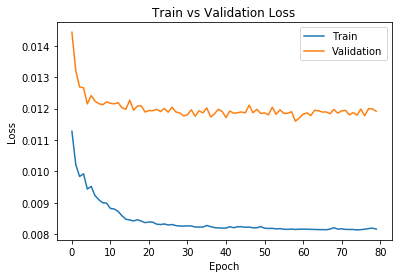

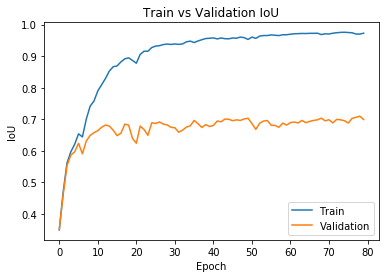

In [9]:
# Train
trainModel(model, train, valid, batch_size=batch_size, lr=lr, num_epochs=80, checkpoint=False, device=device)

In [10]:
model = model.eval()
model.to("cpu")
torch.save(model.state_dict(), "epoch80")
model_state = torch.load("epoch80")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


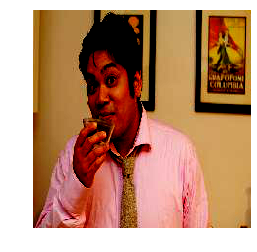

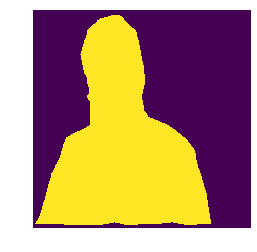

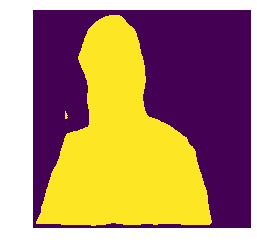

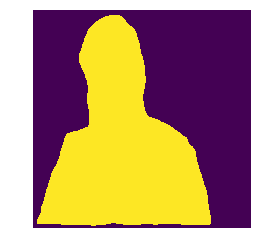

<Figure size 432x288 with 0 Axes>

In [11]:
model.to("cpu")

# After training (train set)
img, target = train_data[-112]
target = target.squeeze(0).detach().numpy()
out = torch.sigmoid(model(img.unsqueeze(0)))
out = out.squeeze(0).squeeze(0).detach().numpy()
out = thresholdProbMask(out)
denoised = denoise(out)

imshow(np.transpose(img.squeeze(0).detach().numpy(), [1,2,0]))
imshow(target)
imshow(out)
imshow(denoised)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


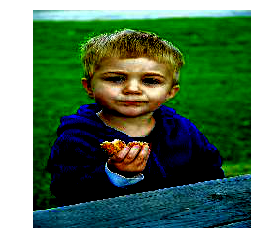

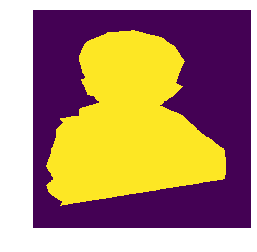

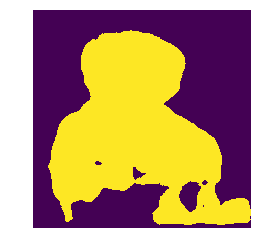

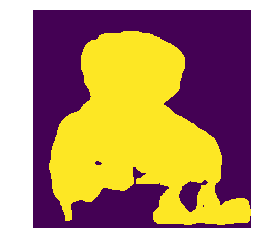

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  del sys.path[0]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


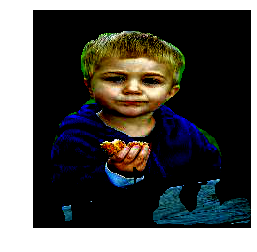

<Figure size 432x288 with 0 Axes>

In [12]:
# After training (validation set)
img, target = valid_data[-2]
target = target.squeeze(0).detach().numpy()
out = torch.sigmoid(model(img.unsqueeze(0)))
out = out.squeeze(0).squeeze(0).detach().numpy()
out = thresholdProbMask(out)
denoised = denoise(out)

imshow(np.transpose(img.squeeze(0).detach().numpy(), [1,2,0]))
imshow(target)
imshow(out)
imshow(denoised)
imshow(np.expand_dims(denoised,axis=3)*np.transpose(img.squeeze(0).detach().numpy(), [1,2,0]))